In [1]:
import numpy as np

# Introducción

## Lanzar una moneda

- **Posición Bayessiana de la estadística**: Dos posibles soluciones al lanzar una monera de mil: tortuga, valor. P(tortuga)=0.5, P(valor)=0.5, P(tortuga)+P(valor)=1.
- **Posición Frecuencias de la estadística**: 

In [20]:
N=4480*32 #0=tortuga, 1=valor
print(N)
lanzamiento=np.round(np.random.random(N))
#print(lanzamiento)
len(lanzamiento[lanzamiento==0])/N, len(lanzamiento[lanzamiento==1])/N

143360


(0.49986746651785713, 0.5001325334821428)

In [24]:
n=np.array([5,10,15,35,70,140,280,560,1120,2240,4480,8960,17920,35840,71680,143360])
ntortuga=np.array([0.6,0.7,0.4,0.514,0.557,0.4785,0.525,0.5035,0.5258,0.5129,0.5058,0.4956,0.4982,0.5007,0.5018,0.4998])
nvalor=[0.4,0.3,0.6,0.485,0.4428,0.5214,0.475,0.4964,0.4741,0.4870,0.4941,0.5043,0.5017,0.4992,0.4981,0.5001]

In [27]:
len(n), len(ntortuga)

(16, 16)

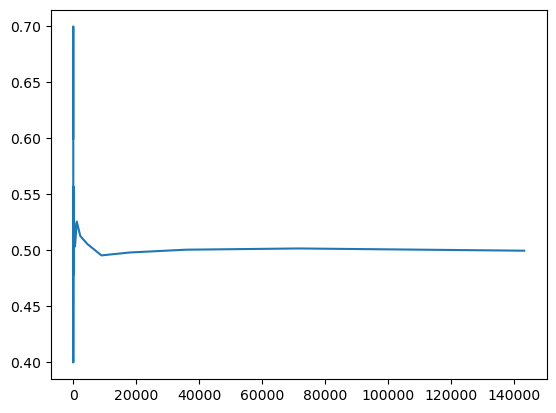

In [28]:
import matplotlib.pyplot as plt
plt.plot(n,ntortuga)

# El algoritmo de Naive Bayes
![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*Vp4WjLi5-3lTCyXkRChCzg.jpeg)
![](https://insightimi.files.wordpress.com/2020/04/unnamed-1.png?w=900&h=434)

Supongamos que es gestor de productos y desea clasificar las opiniones de los clientes en positivas y negativas. O Como gestor de préstamos, quiere identificar qué solicitantes de préstamos son seguros o arriesgados. Como analista sanitario, quiere predecir qué pacientes pueden sufrir la enfermedad de la diabetes. Todos los ejemplos tienen el mismo tipo de problema para clasificar reseñas, solicitantes de préstamos y pacientes.

Naive Bayes es el algoritmo de clasificación más sencillo y rápido, adecuado para grandes cantidades de datos. El clasificador Naive Bayes se utiliza con éxito en diversas aplicaciones, como el filtrado de spam, la clasificación de textos, el análisis de sentimientos y los sistemas de recomendación. Utiliza el teorema de Bayes de la probabilidad para la predicción de clases desconocidas.

# Un ejemplo sencillo...
![](https://proyectodescartes.org/escenas-aux/lg24/img/video.png)

U1=8, U2=7, U3=7, U=22, ¿cuantas urnas hay? cajas=3, P(U1)=1/3, P(A/U1)=4/8=1/2
Voy a sacar una pelota **azul** de la caja 1 --> 1/3, probabilidad de que sea azul P(A)=7/22
P(U1/A)=P(A/U1)*P(A)/P(U1)=1/2*7/22/(1/3)=21/44=0.4772

# Manos a la obra...

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
bean=pd.read_excel("Dry_Bean_Dataset.xlsx")

In [32]:
bean

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13607,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,13608,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,13609,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,13610,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [34]:
bean["Class"].value_counts()/len(bean)

Class
DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: count, dtype: float64

In [ ]:
## Metodología
## 1. Datos. Data mining..
## 2. Dividir el conjunto de datos: X (independientes), y (dependiente(s))
## 3. Dividir; entrenamiento y prueba (0.25, 0.30, 0.35)
## 4. Defino el modelo (¿Cual es el modelo que voy a aplicar?)
## 5. Cargar el modelo --> El modelo viene por defecto vacío!!!!!!!
## 6. Aplicar el modelo --> Entreno el modelo --> Usar los datos de entrenamiento
## 7. Testear, predicción, los prueba con los datos de prueba

In [5]:
X=bean.drop(columns=["Bean ID","Class"])
y1=bean["Class"]

In [6]:
y1

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [7]:
y1.value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.15, random_state=6748)

## Vamos a tratarlo como un problema de clasificación..

In [10]:
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X1_train, y1_train)

# Predict Output
predicted = model.predict(X1_test)

print("Actual Value:", y1_test)
print("Predicted Value:", predicted)

Actual Value: 1950       SEKER
3105    BARBUNYA
2647    BARBUNYA
783        SEKER
6749       HOROZ
          ...   
2004       SEKER
8431        SIRA
8686        SIRA
7590        SIRA
3435      BOMBAY
Name: Class, Length: 2042, dtype: object
Predicted Value: ['SIRA' 'CALI' 'BARBUNYA' ... 'SIRA' 'SEKER' 'BOMBAY']


In [11]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y1_pred = model.predict(X1_test)
accuray = accuracy_score(y1_pred, y1_test)
f1 = f1_score(y1_pred, y1_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7492654260528894
F1 Score: 0.7514416340729629


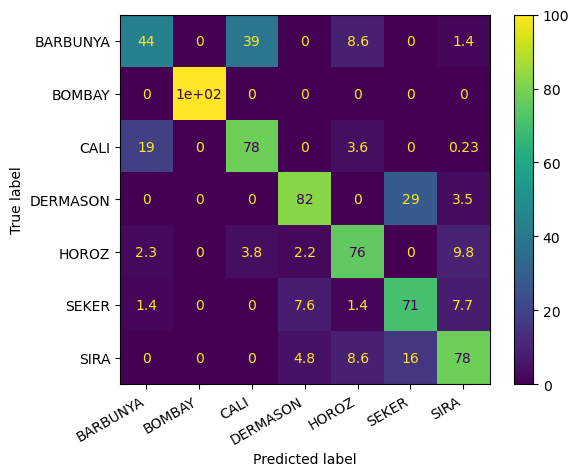

In [12]:
cm=confusion_matrix(y1_test, y1_pred, labels=model.classes_)/confusion_matrix(y1_test, y1_pred, labels=model.classes_).sum(axis=1)*100
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_).plot()
plt.xticks(rotation=30,ha="right")
plt.show()